# rpy2 demo

In [2]:
import rpy2.rinterface
%load_ext rpy2.ipython

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

In [3]:
x_vals = [1, 2, 3, 4]

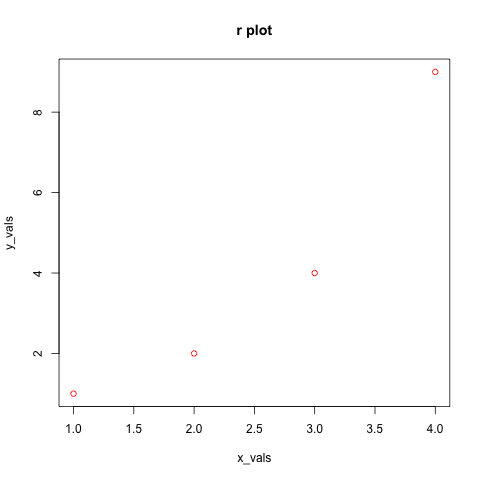

In [4]:
%%R -i x_vals -o y_vals

y_vals <- c(1, 2, 4, 9)

plot(x_vals, y_vals, col="red", main="r plot")

In [5]:
list(y_vals)

[1.0, 2.0, 4.0, 9.0]

In [6]:
import numpy as np
to_r_array = np.array([99, 88])

%Rpush to_r_array

In [7]:
%%R

to_r_array

[1] 99 88


In [97]:
import pandas as pd
test_df = pd.DataFrame({"x": [1,2,3]})

In [98]:
%%R -i test_df

print(test_df)

/Users/yinhang/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


  x
0 1
1 2
2 3


# multivariate normal 样本的 EM 算法

multiple linear regression, PCA, discriminat analysis 和 canonical correlation analysis 都需要 initial summary of **sample mean** and **covariance matrix**

对于任意的 missing pattern，都要能够得到 sample mean 和 convariance matrix

前提：
- 假设可忽略 missing-data mechanism
- 样本服从正态分布


y_obs已知， loglikelihood 是 μ 和 Σ 的函数

# Amelia

Cited by 1678 

https://gking.harvard.edu/amelia

In [38]:
%%R -o freetrade

library(Amelia)
data(freetrade)

In [39]:
freetrade

,year,country,tariff,polity,pop,gdp.pc,intresmi,signed,fiveop,usheg
0,1981,SriLanka,NaN,6,14988000.0,461.023590,1.937347,0,12.4,0.259311
1,1982,SriLanka,NaN,5,15189000.0,473.763397,1.964430,0,12.5,0.255801
2,1983,SriLanka,41.299999,5,15417000.0,489.226562,1.663936,1,12.3,0.265502
3,1984,SriLanka,NaN,5,15599000.0,508.173920,2.797462,0,12.3,0.298801
4,1985,SriLanka,31.000000,5,15837000.0,525.560852,2.259116,0,12.3,0.295243
5,1986,SriLanka,NaN,5,16117000.0,538.923706,1.832549,0,12.5,0.288656
6,1987,SriLanka,27.299999,5,16361000.0,540.047485,1.422983,0,12.5,0.273409
7,1988,SriLanka,27.299999,5,16587000.0,545.861023,1.059624,1,12.6,0.275647
8,1989,SriLanka,NaN,5,16806000.0,551.135315,1.137557,0,12.6,0.278539
9,1990,SriLanka,28.299999,5,16993000.0,579.954834,1.663632,0,12.7,0.260833


In [40]:
null_rows = freetrade.isnull().any(axis=1)

In [41]:
null_rows

0       True
1       True
2      False
3       True
4      False
5       True
6      False
7      False
8       True
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17      True
18      True
19     False
20      True
21      True
22      True
23      True
24     False
25     False
26      True
27      True
28     False
29     False
       ...  
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150     True
151     True
152    False
153     True
154     True
155     True
156    False
157     True
158     True
159     True
160    False
161    False
162    False
163     True
164    False
165    False
166    False
167     True
168     True
169     True
170     True
Length: 171, dtype: bool

In [43]:
freetrade[null_rows]

,year,country,tariff,polity,pop,gdp.pc,intresmi,signed,fiveop,usheg
0,1981,SriLanka,NaN,6,14988000.0,461.023590,1.937347,0,12.4,0.259311
1,1982,SriLanka,NaN,5,15189000.0,473.763397,1.964430,0,12.5,0.255801
3,1984,SriLanka,NaN,5,15599000.0,508.173920,2.797462,0,12.3,0.298801
5,1986,SriLanka,NaN,5,16117000.0,538.923706,1.832549,0,12.5,0.288656
8,1989,SriLanka,NaN,5,16806000.0,551.135315,1.137557,0,12.6,0.278539
15,1996,SriLanka,NaN,5,18300000.0,727.003906,3.676763,0,13.2,0.268170
17,1998,SriLanka,NaN,5,18778000.0,789.300293,NaN,0,NaN,0.295668
18,1999,SriLanka,NaN,6,18985000.0,814.268616,NaN,0,NaN,0.308315
20,1982,India,NaN,8,718425600.0,239.694702,5.961527,0,12.5,0.255801
21,1983,India,NaN,8,734071936.0,252.007416,5.678774,0,12.3,0.265502


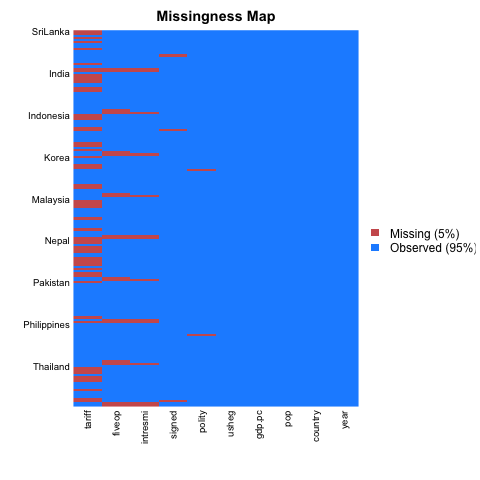

In [95]:
%%R

missmap(freetrade, cs="country")

x轴变量按照缺失度降序排序

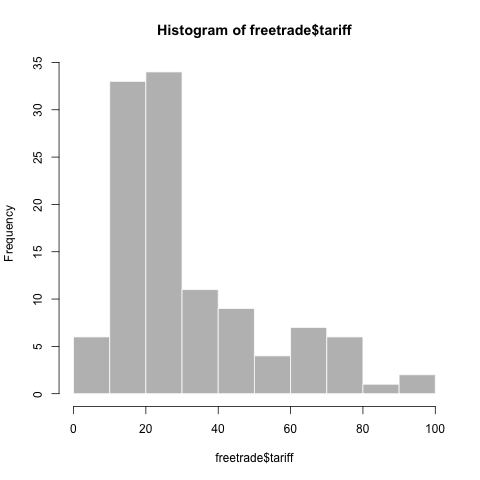

In [67]:
%%R

hist(freetrade$tariff, col="grey", border="white")

In [ ]:
%%R

a.out <- amelia(freetrade, m=5, ts="year", cs="country", boot.type = "none")

In [57]:
%%R -o imputations

aout <- amelia(freetrade, m=5, ts="year", cs="country")
print(aout)

imputations = aout$imputations

-- Imputation 1 --

  1  2  3  4  5  6  7  8  9 10 11 12 13

-- Imputation 2 --

  1  2  3  4  5  6  7  8  9 10 11 12

-- Imputation 3 --

  1  2  3  4  5  6  7  8  9 10 11 12 13

-- Imputation 4 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

-- Imputation 5 --

  1  2  3  4  5  6  7  8  9 10 11


Amelia output with 5 imputed datasets.
Return code:  1 
Message:  Normal EM convergence. 

Chain Lengths:
--------------
Imputation 1:  13
Imputation 2:  12
Imputation 3:  13
Imputation 4:  17
Imputation 5:  11



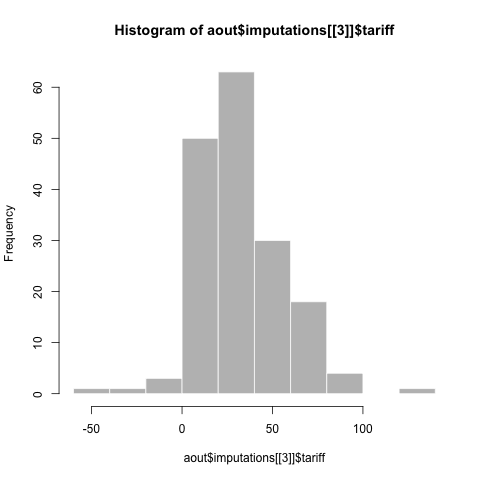

In [66]:
%%R

hist(aout$imputations[[3]]$tariff, col="grey", border="white")

In [59]:
imputations[1]

year,country,tariff,...,signed,fiveop,usheg
"1,981",'SriLanka',39.168573,...,0.000000,12.400000,0.259311
"1,982",'SriLanka',23.165927,...,0.000000,12.500000,0.255801
"1,983",'SriLanka',41.299999,...,1.000000,12.300000,0.265502
"1,984",'SriLanka',37.441892,...,0.000000,12.300000,0.298801
...,...,...,...,...,...,...
"1,996",'Thailand',6.987323,...,0.000000,13.200000,0.268170
"1,997",'Thailand',6.888329,...,0.036563,13.200000,0.284404
"1,998",'Thailand',20.100000,...,0.000000,12.857755,0.295668
"1,999",'Thailand',17.100000,...,0.000000,12.919894,0.308315


In [63]:
with localconverter(ro.default_converter + pandas2ri.converter):
    df_from_r_df = ro.conversion.ri2py(imputations[1])

/Users/yinhang/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [65]:
df_from_r_df[null_rows]

,year,country,tariff,polity,pop,gdp.pc,intresmi,signed,fiveop,usheg
0,1981,SriLanka,39.168573,6.0,14988000.0,461.023590,1.937347,0.000000,12.400000,0.259311
1,1982,SriLanka,23.165927,5.0,15189000.0,473.763397,1.964430,0.000000,12.500000,0.255801
3,1984,SriLanka,37.441892,5.0,15599000.0,508.173920,2.797462,0.000000,12.300000,0.298801
5,1986,SriLanka,45.275623,5.0,16117000.0,538.923706,1.832549,0.000000,12.500000,0.288656
8,1989,SriLanka,55.443275,5.0,16806000.0,551.135315,1.137557,0.000000,12.600000,0.278539
15,1996,SriLanka,2.498277,5.0,18300000.0,727.003906,3.676763,0.000000,13.200000,0.268170
17,1998,SriLanka,44.397581,5.0,18778000.0,789.300293,4.225123,0.000000,12.643029,0.295668
18,1999,SriLanka,17.569090,6.0,18985000.0,814.268616,3.338569,0.000000,12.523634,0.308315
20,1982,India,57.653288,8.0,718425600.0,239.694702,5.961527,0.000000,12.500000,0.255801
21,1983,India,53.435558,8.0,734071936.0,252.007416,5.678774,0.000000,12.300000,0.265502


## ordinal的处理

In [69]:
df_from_r_df["polity"].unique()

array([ 6.        ,  5.        ,  8.        ,  9.        , -7.        ,
       -5.        ,  7.        ,  0.62852446,  4.        ,  3.        ,
       -2.        , -4.        , -6.        , -8.        ,  5.6805893 ,
        2.        , -1.        ])

In [73]:
%%R

aout <- amelia(freetrade, m=5, ts="year", cs="country", ords="polity", p2s=0)
table(aout$imputations[[3]]$polity)


-8 -7 -6 -5 -4 -2 -1  1  2  3  4  5  6  7  8  9 
 1 22  4  7  3  9  1  1  7  8 15 26 13  5 36 13 


## nominal的处理

In [74]:
df_from_r_df["signed"].unique()

array([ 0.        ,  1.        ,  0.62927564, -0.0169045 ,  0.03656268])

In [75]:
%%R

aout <- amelia(freetrade, m=5, ts="year", cs="country", noms="signed", p2s=0)
table(aout$imputations[[3]]$signed)


  0   1 
145  26 


## 偏态分布的处理

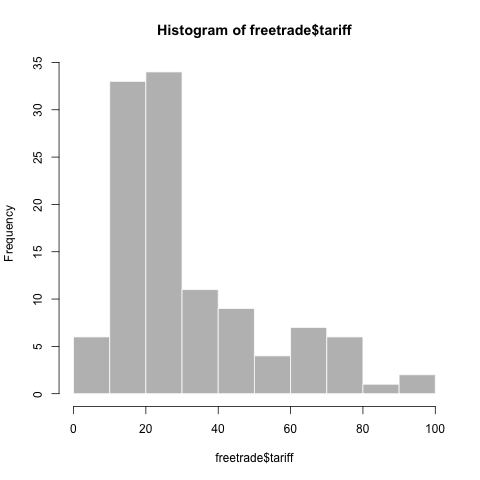

In [76]:
%%R

hist(freetrade$tariff, col="grey", border="white")

取对数，也可以给amelia指定logs参数

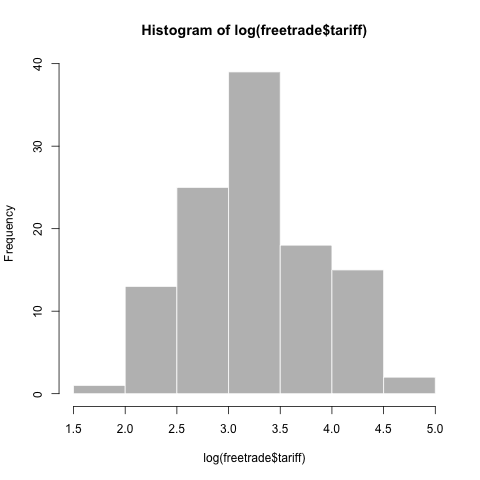

In [77]:
%%R

hist(log(freetrade$tariff), col="grey", border="white")

## 更多的处理

- 离散值，可以开根号
- 分数值0~1，可以logistic变换

## 随时间平滑变化的变量处理

ts指定时间变量
cs指定更多可以变化的维度， 同时要指定intercs=TRUE

_另外一种是设置lags, leads, 详见amelia手册_

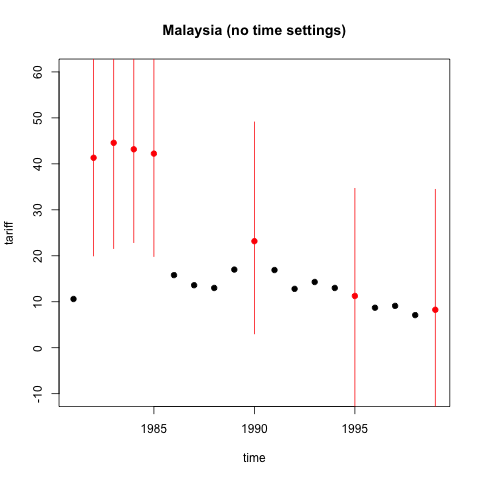

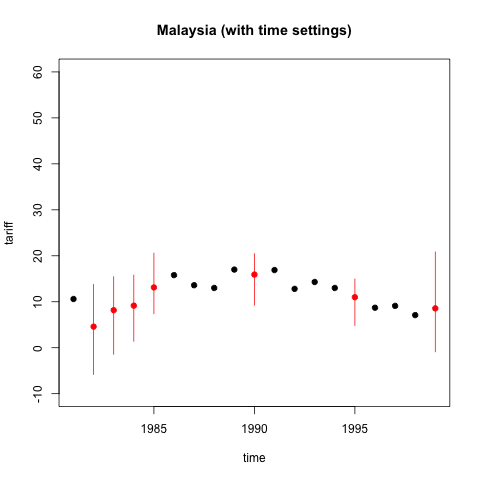

In [78]:
%%R

a.out <- amelia(freetrade, ts="year", cs="country", polytime=2, p2s=0)
a.out.time <- amelia(freetrade, ts="year", cs="country", polytime=2, intercs=TRUE, p2s=0)

tscsPlot(a.out, cs="Malaysia", main="Malaysia (no time settings)", var="tariff", ylim=c(-10, 60))
tscsPlot(a.out.time, cs="Malaysia", main="Malaysia (with time settings)", var="tariff", ylim=c(-10, 60))

## 设置prior

In [79]:
%%R

freetrade[freetrade$country == "Thailand", c("year","country","tariff")]

    year  country tariff
153 1981 Thailand   32.3
154 1982 Thailand     NA
155 1983 Thailand     NA
156 1984 Thailand     NA
157 1985 Thailand   41.2
158 1986 Thailand     NA
159 1987 Thailand     NA
160 1988 Thailand     NA
161 1989 Thailand   40.8
162 1990 Thailand   39.8
163 1991 Thailand   37.8
164 1992 Thailand     NA
165 1993 Thailand   45.6
166 1994 Thailand   23.3
167 1995 Thailand   23.1
168 1996 Thailand     NA
169 1997 Thailand     NA
170 1998 Thailand   20.1
171 1999 Thailand   17.1


- 通过指定均值和方差

In [80]:
%%R

pr <- matrix(c(158,159,160,3,3,3,40,40,40,3,3,3), nrow=3, ncol=4)
pr

     [,1] [,2] [,3] [,4]
[1,]  158    3   40    3
[2,]  159    3   40    3
[3,]  160    3   40    3


第一列是行号，第二列是"tariff"对应的列号，第三列是均值，第四列是方差

第一列可以是0，表明默认情况（其他所有为显示指定的列）

- 通过指定置信区间

In [81]:
%%R

pr.2 <- matrix(c(158,159,160,3,3,3,34,34,34,46,46,46,.95,.95,.95), nrow=3, ncol=5)
pr.2

     [,1] [,2] [,3] [,4] [,5]
[1,]  158    3   34   46 0.95
[2,]  159    3   34   46 0.95
[3,]  160    3   34   46 0.95


表明%95的情况应该位于[34,46]的区间

In [84]:
%%R

a.out.pr <- amelia(freetrade, ts = "year", cs = "country", priors = pr, p2s=0)

## 设置范围 (bounds)

不建议，极大削弱了插补的随机特征

In [86]:
%%R

bds <- matrix(c(3, 30, 40), nrow = 1, ncol = 3)
bds

     [,1] [,2] [,3]
[1,]    3   30   40


第一列是变量编号，值域在[30,40]间

rejection sampling

In [89]:
%%R

a.out.bds <- amelia(freetrade, ts = "year", cs = "country", bounds = bds, max.resample = 1000, p2s=0)

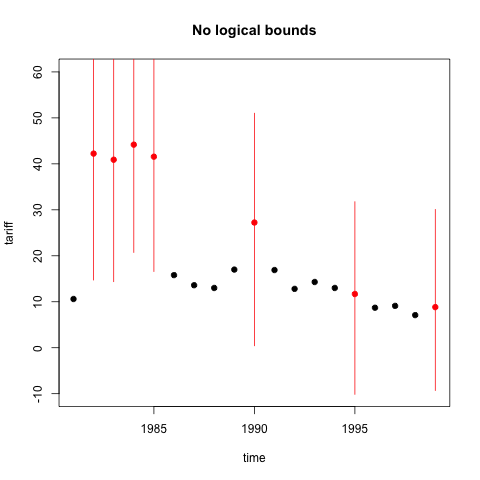

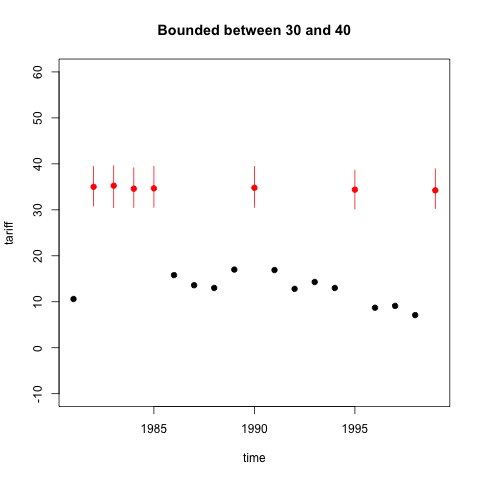

In [90]:
%%R

tscsPlot(a.out, cs = "Malaysia", main = "No logical bounds", var = "tariff", ylim = c(-10,60)) 
tscsPlot(a.out.bds, cs = "Malaysia", main = "Bounded between 30 and 40", var = "tariff", ylim = c(-10,60))

# 检查插补结果

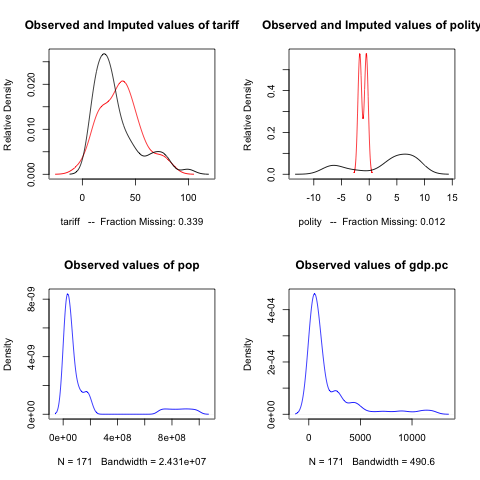

In [91]:
%%R

plot(a.out, which.vars = 3:6)

红色曲线是对每一个单元格的插补值，取各输出数据集的均值
黑色曲线是观察值
蓝色曲线表明该变量无缺失值

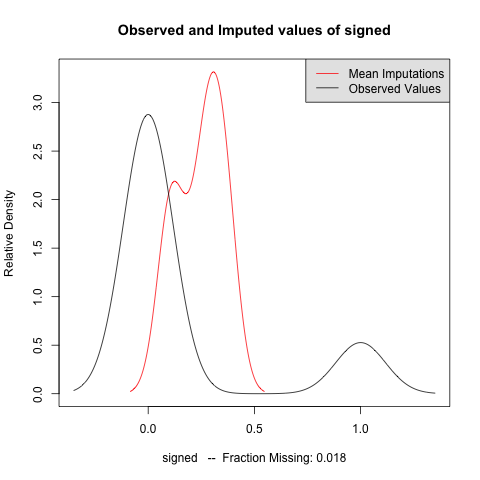

In [92]:
%%R

compare.density(a.out, var="signed")

## 通过overimpute检查

假设已观察的值未被观察，来对其插补

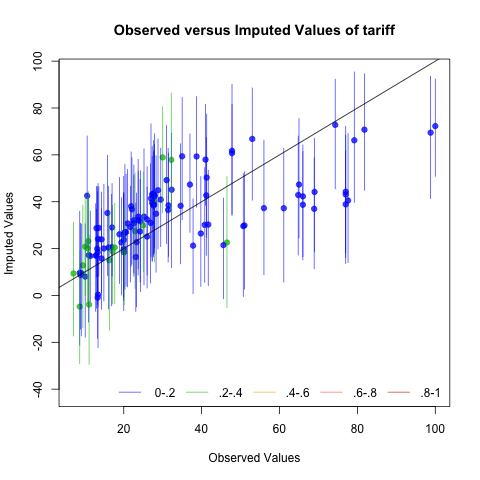

In [93]:
%%R

overimpute(a.out, var="tariff")

看有多少点的置信区间(confidence interval)与y=x相交，表明是正确的

## 检查不同的初始值对于EM收敛的影响

是否是local maximum

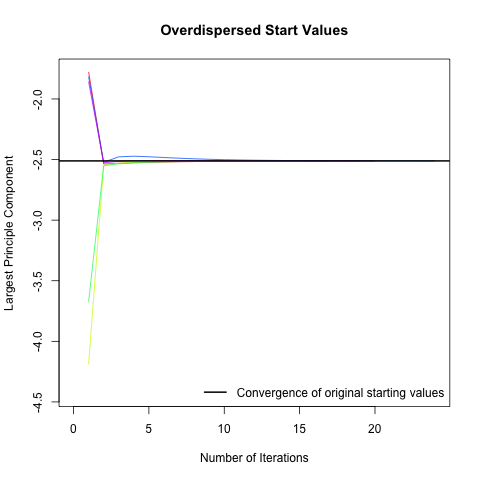

In [94]:
%%R

disperse(a.out, dims = 1, m = 5)

In [96]:
%%R

summary(a.out)


Amelia output with 5 imputed datasets.
Return code:  1 
Message:  Normal EM convergence. 

Chain Lengths:
--------------
Imputation 1:  24
Imputation 2:  16
Imputation 3:  30
Imputation 4:  16
Imputation 5:  20

Rows after Listwise Deletion:  96 
Rows after Imputation:  171 
Patterns of missingness in the data:  8 

Fraction Missing for original variables: 
-----------------------------------------

         Fraction Missing
year           0.00000000
country        0.00000000
tariff         0.33918129
polity         0.01169591
pop            0.00000000
gdp.pc         0.00000000
intresmi       0.07602339
signed         0.01754386
fiveop         0.10526316
usheg          0.00000000

